# Лабораторная работа 2. Приложения сингулярного разложения

In [3]:
import scipy as sp
import pylab as pl
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale
%pylab inline

Фамилия, имя: Volkonskiy Denis

Отделение: Computer science

## 1. Сжатие информации с помощью SVD (3 балла)

Загрузите выложенную на странице курса фотографию вашего любимого куратора Сони.

Поскольку фотография чёрно-белая, её можно проинтерпетировать как матрицу, элементы которой - это насыщенность серого цвета каждого из пикселей. Постройте сингулярное разложение этой матрицы (не нужно центрировать данные!). 

Визуализуйте первую главную компоненту. Ожидали ли вы увидеть именно это? Почему?

Визуализуйте компонеты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

Как вам кажется, сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения? Во сколько раз меньше памяти потребуется для их хранения? Как изменится результат, если сначала вы центрируете данные?

### Решение

Загрузим изображение

In [4]:
from PIL import *
from scipy import misc

img = misc.imread(r'qKPNJo8.jpg')[:,:,0]

Посмотрим на Соню!

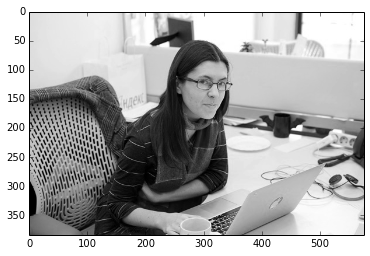

In [5]:
plt.gray()
imgplot = plt.imshow(img)
plt.show()

In [231]:
def ZipPicture(img, last_sigma, first_sigma):
    u, s, v = np.linalg.svd(img)
    s = np.diag(s[first_sigma:last_sigma])
    u = u[:, first_sigma:last_sigma]
    v = v[first_sigma:last_sigma, :]
    small_matrix = u.dot(s.dot(v))
    return small_matrix

def Show(img, last_sigma, first_sigma):
    plt.imshow(ZipPicture(img, last_sigma, first_sigma))
    plt.show()
# print smallmatrix

##Оставим первые компоненты

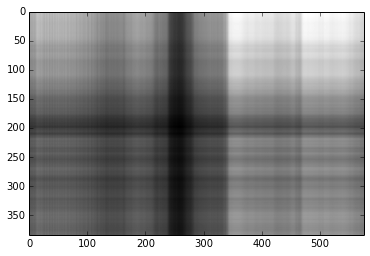

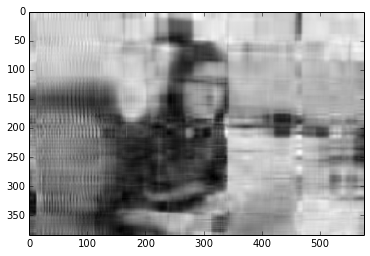

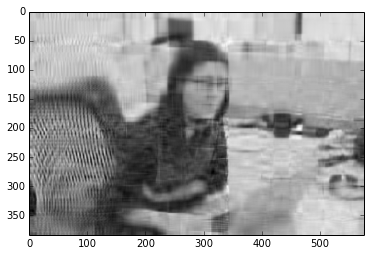

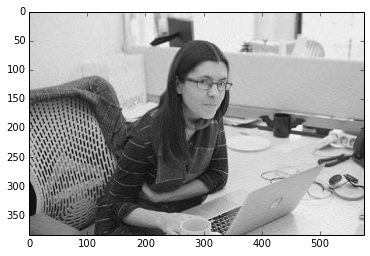

In [236]:
Show(img, 1, 0)
Show(img, 10, 0)
Show(img, 20, 0)
Show(img, 100, 0)

идно, что при 100 компонентах изображение достаточно хорошее. Следовательно количество чисел при хранении
можно уменьшить примерно в 2 раза. (количество компонент)*(384 + 576), а изначально было 384 * 576.

## Обнулим первые компоненты

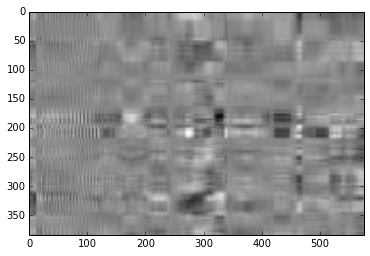

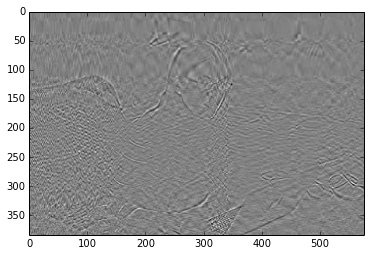

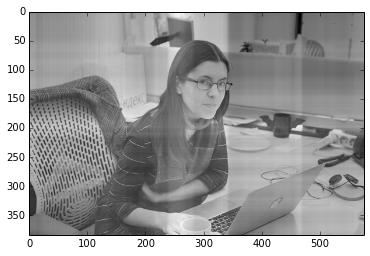

In [237]:
Show(img, 10, 5)
Show(img, 100, 50)
Show(img, 380, 1)

При удалении самых больших компонент картинка становится светлее. Видно, что в матрице появляются 
отрицательные элементы.

In [242]:
img_centre = scale(img, with_mean = True, with_std=False, axis=0)
Show(img_centre,380, 0)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:498: UserWarning: The scale function assumes floating point values as input, got uint8
  "got %s" % (estimator, X.dtype))
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:145: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  Xr -= mean_
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:153: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:158: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  Xr -= mean_1


array([[229, 226, 228, ...,   6,   4,   3],
       [229, 226, 228, ...,   6,   4,   3],
       [229, 226, 228, ...,   6,   4,   3],
       ..., 
       [ 87,  84,  87, ..., 224, 221, 220],
       [ 81,  78,  82, ..., 224, 221, 219],
       [ 74,  73,  77, ..., 223, 220, 219]], dtype=uint8)

**Внимание!** Если вы работаете на кластере, загрузка фотографии будет выглядеть так:

In [7]:
!sudo apt-get install -y --force-yes python-PIL

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following extra packages will be installed:
  liblcms2-2 libwebp5 libwebpmux1
Suggested packages:
  liblcms2-utils python-pil-doc python-pil-dbg
The following NEW packages will be installed:
  liblcms2-2 libwebp5 libwebpmux1 python-pil
0 upgraded, 4 newly installed, 0 to remove and 11 not upgraded.
Need to get 570 kB of archives.
After this operation, 1989 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu/ trusty/main liblcms2-2 amd64 2.5-0ubuntu4 [132 kB]
Get:2 http://archive.ubuntu.com/ubuntu/ trusty/main libwebp5 amd64 0.4.0-4 [146 kB]
Get:3 http://archive.ubuntu.com/ubuntu/ trusty/main libwebpmux1 amd64 0.4.0-4 [13.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu/ trusty/main python-pil amd64 2.3.0-1ubuntu3 [279 kB]
Fetched 570 kB in 1s (411 kB/s)
Selecting previously unselected package liblcms2-2:amd64.
(Reading database ... 40414 files and directories cur

In [13]:
!sudo apt-get install -y --force-yes python-scipy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following extra packages will be installed:
  libamd2.3.1 libcamd2.3.1 libccolamd2.8.0 libcholmod2.1.2 libcolamd2.8.0
  libumfpack5.6.2 python-decorator python-imaging python-numpy
Suggested packages:
  python-nose python-numpy-dbg python-numpy-doc
The following NEW packages will be installed:
  libamd2.3.1 libcamd2.3.1 libccolamd2.8.0 libcholmod2.1.2 libcolamd2.8.0
  libumfpack5.6.2 python-decorator python-imaging python-numpy python-scipy
0 upgraded, 10 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.1 MB of archives.
After this operation, 43.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu/ trusty/main libamd2.3.1 amd64 1:4.2.1-3ubuntu1 [23.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu/ trusty/main libcamd2.3.1 amd64 1:4.2.1-3ubuntu1 [21.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu/ trusty/main libccolamd2.8.0 amd64 1:4.2.1-3ubuntu1 [2

In [6]:
img = misc.imread("qKPNJo8.jpg")[:,:,0]

Если же кластер утверждает, что такого файла нет, загрузите его с помощью команды

In [3]:
!wget http://i.imgur.com/qKPNJo8.jpg

--2015-11-26 17:41:32--  http://i.imgur.com/qKPNJo8.jpg
Resolving i.imgur.com (i.imgur.com)... 185.31.17.193
Connecting to i.imgur.com (i.imgur.com)|185.31.17.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67750 (66K) [image/jpeg]
Saving to: 'qKPNJo8.jpg'

100%[======================================>] 67,750      --.-K/s   in 0.08s   

2015-11-26 17:41:32 (799 KB/s) - 'qKPNJo8.jpg' saved [67750/67750]



In [192]:
!wget https://yadi.sk/d/LH5eG6_rkkyt6

--2015-12-01 16:28:37--  https://yadi.sk/d/LH5eG6_rkkyt6
Resolving yadi.sk (yadi.sk)... 213.180.193.50
Connecting to yadi.sk (yadi.sk)|213.180.193.50|:443... failed: Connection timed out.
Retrying.

--2015-12-01 16:30:46--  (try: 2)  https://yadi.sk/d/LH5eG6_rkkyt6
Connecting to yadi.sk (yadi.sk)|213.180.193.50|:443... failed: Connection timed out.
Retrying.

--2015-12-01 16:32:55--  (try: 3)  https://yadi.sk/d/LH5eG6_rkkyt6
Connecting to yadi.sk (yadi.sk)|213.180.193.50|:443... failed: Connection timed out.
Retrying.

--2015-12-01 16:35:05--  (try: 4)  https://yadi.sk/d/LH5eG6_rkkyt6
Connecting to yadi.sk (yadi.sk)|213.180.193.50|:443... failed: Connection timed out.
Retrying.

--2015-12-01 16:37:16--  (try: 5)  https://yadi.sk/d/LH5eG6_rkkyt6
Connecting to yadi.sk (yadi.sk)|213.180.193.50|:443... ^C


## 2. Визуализация данных с помощью SVD (5 баллов)

Загрузите со страницы курса файлы `messages_texts.txt`, `messages_features.txt` и `messages_vectorized.txt`.

**Внимание!** Не пытайтесь открыть файл `messages_vectorized.txt` в блокноте или, тем более, распечатать его в IPython ноутбуке. Сначала посмотрите на его объём.

* `messages_texts.txt` содержит некоторое количество текстовых сообщений на английском языке с кучей разных дополнительных данных, которые вам не нужны. Сообщение номер k начинается с заголовка post_number_k.
* `messages_features.txt` содержит список слов, которые содержатся в теле сообщений, кроме самых употребительных из списка `stopwords.words("english")`
* `messages_vectorized.txt` содержит матрицу, в которой указано, сколько раз каждое слово встретилось в каждом сообщении.

Загрузите эту матрицу с помощью функции `numpy.loadtxt`. Найдите её сингулярное разложение. Визуализуйте несколько первых признаков. Постарайтесь понять, сколько различных тематик было представлено в исходной выборке. Что это за тематики? Попытайтесь выяснить, какие слова в наибольшей степени влияют на отнесение текста к той ли иной тематике.

Не обязательно парсить файл `messages_texts.txt`; чтобы найти сообщение с нужным номером, вы можете просто воспользоваться поиском по файлу!

Считаем данные из файла. Я использовал уменьшенную версию данных, так как считал на своем стареньком ноутбуке. (т.к. сервер в последний день работал очен плохо)

In [4]:
data = np.loadtxt(r'messages_vectorized_small.txt', delimiter = ',')
print(data[10][20])

0.0


In [26]:
print("Texts number =", len(data))
print("Words number =", len(data[0]))

Texts number = 1733
Words number = 10000


Вычислим сингулярное разложение данной матрицы с помощью __np.linalg.svd__

In [5]:
U, D, V = np.linalg.svd(data, full_matrices=False)

Получим матрицу __USigma__ - матрицу скрытых признаков.

In [28]:
USigma = U.dot(np.diag(D))
USigma = scale(USigma, with_mean = True, with_std=False, axis=0)

Теперь, давайте, изобразим несколько графиков, отображающих скрытые признаки.

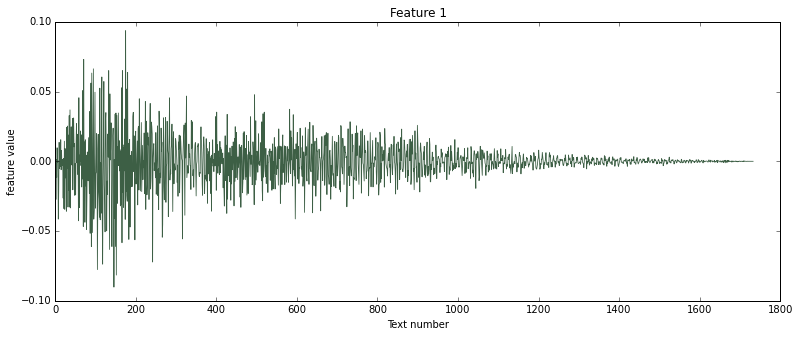

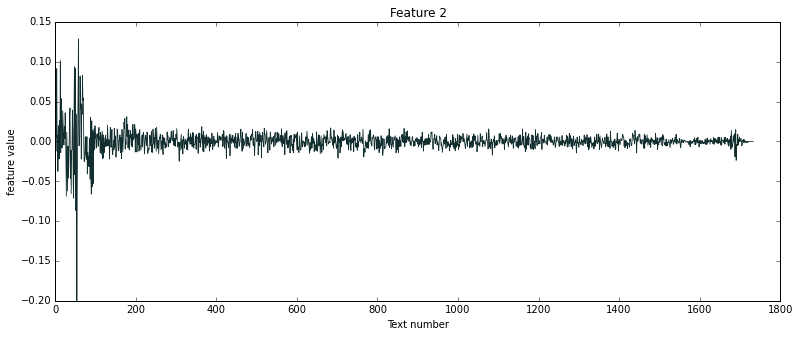

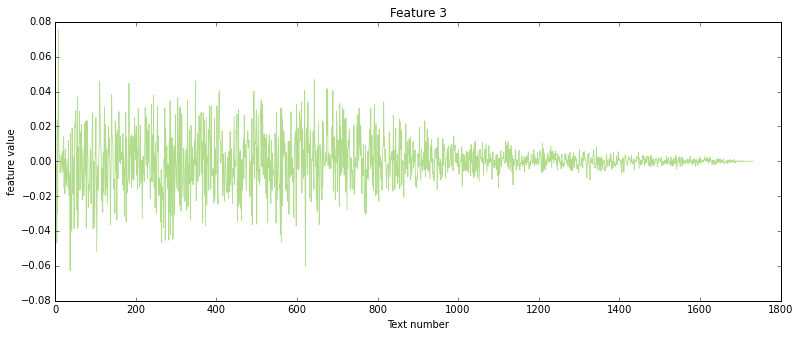

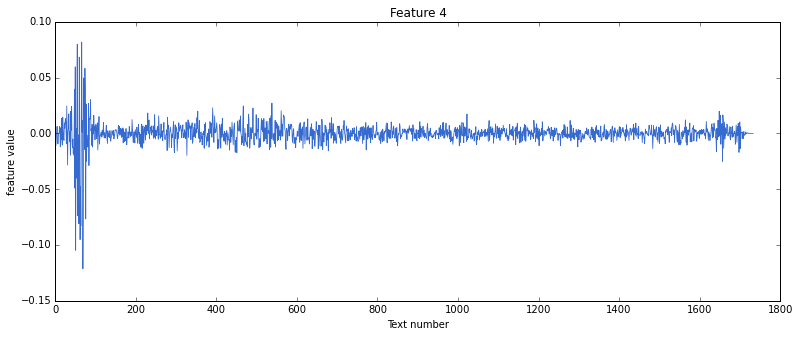

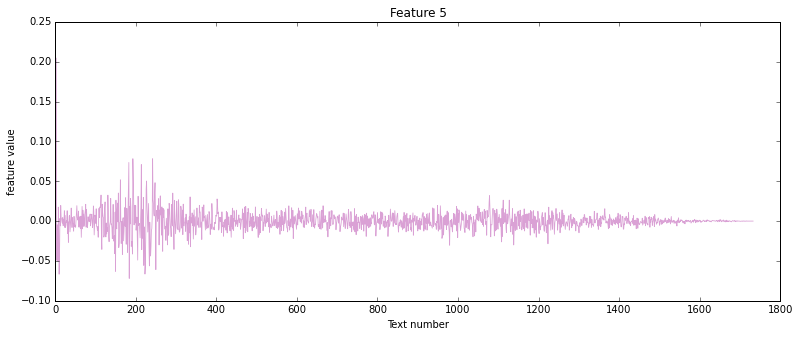

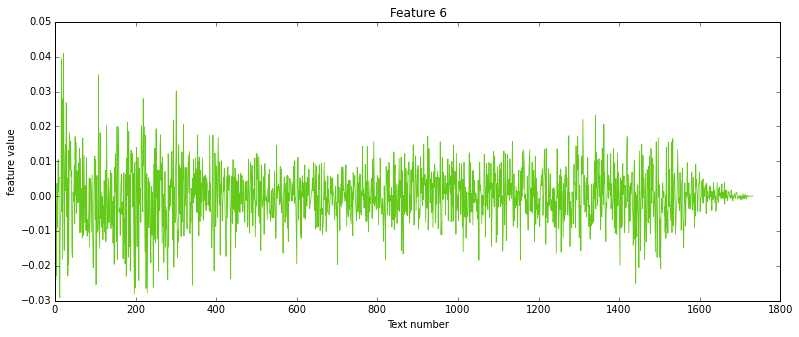

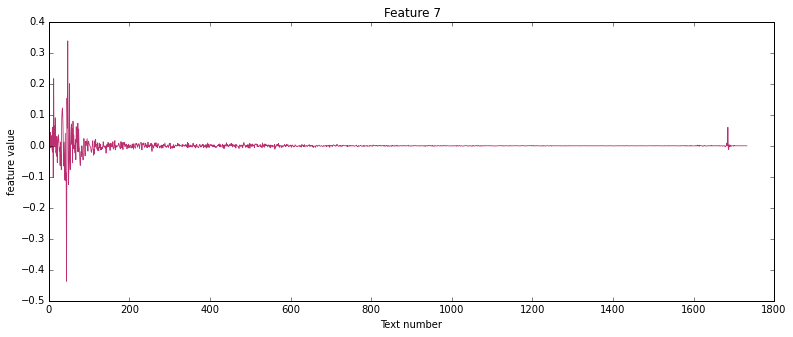

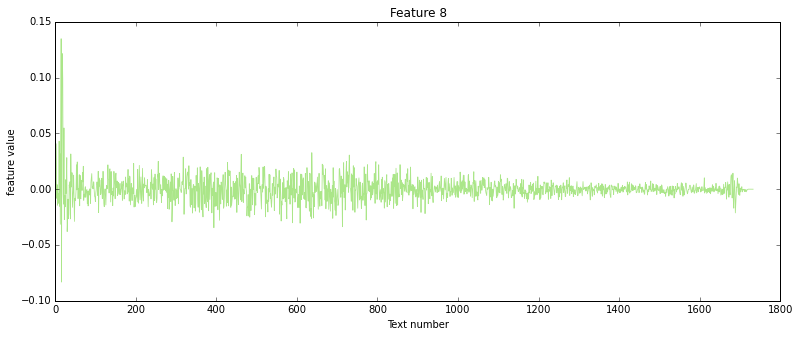

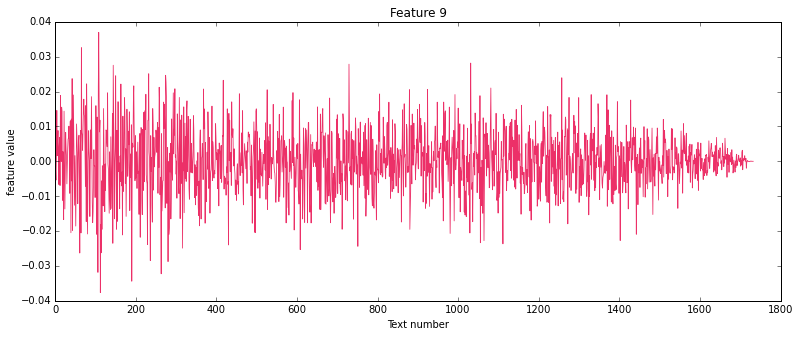

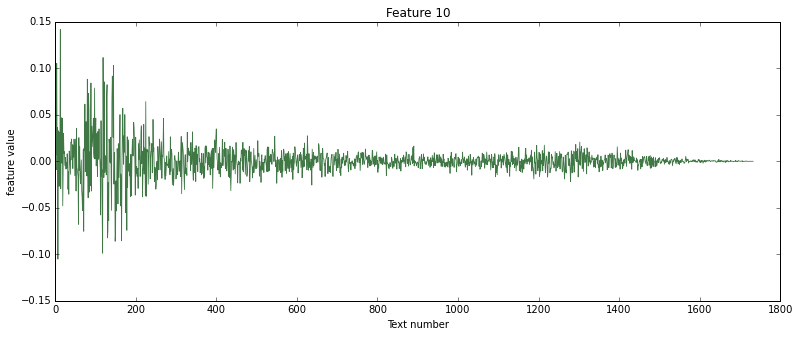

In [44]:
for i in range(10):
    figure(figsize=(13, 5))
    plt.plot(range(len(USigma[i])), USigma[i], linewidth=0.8, color=numpy.random.rand(3,1))
    plt.xlabel('Text number')
    plt.ylabel('feature value')
    plt.title('Feature ' + str(i + 1))
    plt.show()

По внешнему виду графики можно разбить на три группы.

Первая группа - это графики 1, 3. В этой группе характерно довольно плавное уменьшение амплитуды при увеличении номера текста. 

Группа 2,4,5,7,8. В данном случае имеется огромная амплидуда в самых ранних текстах и очень маленькое изменение в текстах, начиная, примерно, с сотого.

10 график - это что среднее между первой и второй группами. Его можно отнести и туда, и туда.

Третья группа - это 6,9. В данной группе прослеживается сильное изменение амплитуды на протяжении всех текстов, от начала и до конца.

Также заметим, что амплитуда очень большая. Это говорит о том, что тексты чередуются по темам.

На графиках 2, 4, 7, 8 прослеживается довольно сильное изменение на самых последних текстах.

Есть подозрение, что это тесты, связанные с пронраммирование. Вот пример парочки из них:

_Is there an Xt call to give me my application context?
I am fixing up an X/Motif program, and am trying to use XtAppAddTimeOut,
whose first argument is the app_context.  What call can I use
to give me this value?
_
    

И отрывок еще одного текста.

_One advanage of MIT-SHM is that if your images are large, you don't end up
 growing the size of the server process to hold them.

  Correct. Most X servers use a version of  malloc(3)  which will not return
  memory to the OS (ie. the X server might  free(3)  a Pixmap, but the heap does
  not shrink)._

## 3. Низкоранговые приближения (3 балла)

В этой задаче вам предстоит поразмышлять о низкоранговых приближениях и об их месте в мироздании.

Везде ниже $||\cdot||_2$ --- это операторная $l_2$-норма.

Зафиксируем некоторое $\varepsilon > 0$. Найти низкоранговое приближение матрицы $A$ с точностью $\varepsilon$ --- значит найти такую матрицу $Q$ с $k = k(\varepsilon)$ ортонормированными столбцами, для которой
$$
\begin{matrix}
\phantom{AAAAAAAAAAAAAAAAA} &
||A - QQ^TA||_2 < \varepsilon & \phantom{AAAAAAAAAAAAaa}(1)\end{matrix}$$
В этом случае линейная оболочка столбцов матрицы $Q$ является в каком-то смысле приближённым образом $A$.

Если ранг $k$ нам из каких-то соображений известен, то можно воспользоваться, например, сингулярным разложением. А если нет? Есть несколько способов этот ранг найти; мы предлагаем вам поэкспериментировать с одним из них.

Идея проста: если мы возьмём образы достаточно большого количества случайных векторов (обычно их берут из стандартного нормального распределения), с хорошей вероятностью их линейная оболочка будет приближать образ с нужной нам точностью. Главный вопрос в том, когда имеет смысл остановиться. И здесь помогает следующая

**Теорема.** Пусть $B\in\mathrm{Mat}_{m\times n}$ --- некоторая матрица, $\omega_1,\ldots,\omega_r$ --- случайные векторы, независимо выбранные из стандартного нормального распределения. Тогда
$$P\left\{||B||\leqslant 10\sqrt{\frac{2}{\pi}}\max_i{||B\omega_i||}\right\} \geqslant 1 - \min(m,n)\cdot10^{-r}$$

Воспользовавшись этой теоремой, напишите функцию `find_approximate(A, eps)`, находящую для данной матрицы $A$ и уровня точности $\varepsilon$ матрицу $Q$, удовлетворяющую условию (1). Поэкспериментируйте с матрицами разного размера. Получается ли ошибка $||A - QQ^TA||_2$ достаточно малой?

**Дополнительные вопросы:**

1. Каков вообще (геометрический? линейно алгебраический?) смысл неравенства $||A - QQ^TA||_2 < \varepsilon$? Что мы имеем в виду говоря, что линейная оболочка столбцов матрицы $Q$ является приближённым образом $A$?

2. Как построить приближённый SVD, если у нас уже имеется матрица $Q$, удовлетворяющая условию (1)? Найдите этим способом сингулярное разложение матрицы Гильберта и сравните его с вычисленным с помощью библиотечной функции `scipy.linalg.svd`. Удаётся ли вашей функции обогнать по времени библиотечную?

3. Зачастую при поиске низкорангового приближения фиксированного ранга $k$ для матрицы $A$ работают даже не с ней. а с матрицей $(AA^T)^qA$, где $q$ --- небольшое натуральное число (скажем, $2$ или $3$). Зачем это нужно? В каких случаях это оправдано?

4. У функции `make_regression` (см. ниже) есть любопытный параметр `effective_rank` (эффективный ранг). Попробуйте разобраться, что это такое. Можете попробовать дать его определение. Просто механически скопированная выдержка из какой-нибудь умной статьи не подойдёт; хочется, чтобы вы как следует разобрались с этим.

**В помощь хозяйке:**

Сгенерировать матрицу $X$ размера $m\times n$ с эффективным рангом $k$ можно с помощью команды

`X, y = make_regression(n_samples=m, n_features=n, n_informative=n, n_targets=1, bias=0.0, \
                       effective_rank=k, tail_strength=..., noise=0.0, shuffle=True, coef=False, random_state=None)`

Можете поэкспериментировать со значением `tail_strength`.